In [9]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

# imports
import pickle
import os
from pathlib import Path

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature

from src.utils.data_utils import DataMapping
import src.utils.standard_plots as sp

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [11]:
PREDICTIONS_FOLDER = 'data/processed/predictions/'
CETB_FOLDER = 'data/raw/CETB_AMSR2/'

# Map data

In [12]:
CETB_mapping = DataMapping(CETB_FOLDER,'CETB')

# map SD data
sd_files = os.listdir(PREDICTIONS_FOLDER)

sd_df = pd.DataFrame({'date':[], 'filename': []})
for file in sd_files:
    file = Path(os.path.join(PREDICTIONS_FOLDER, file))
    stem = file.stem
    sd_df.loc[len(sd_df)] = [stem.split('_')[-1], file]

# Display some predictions

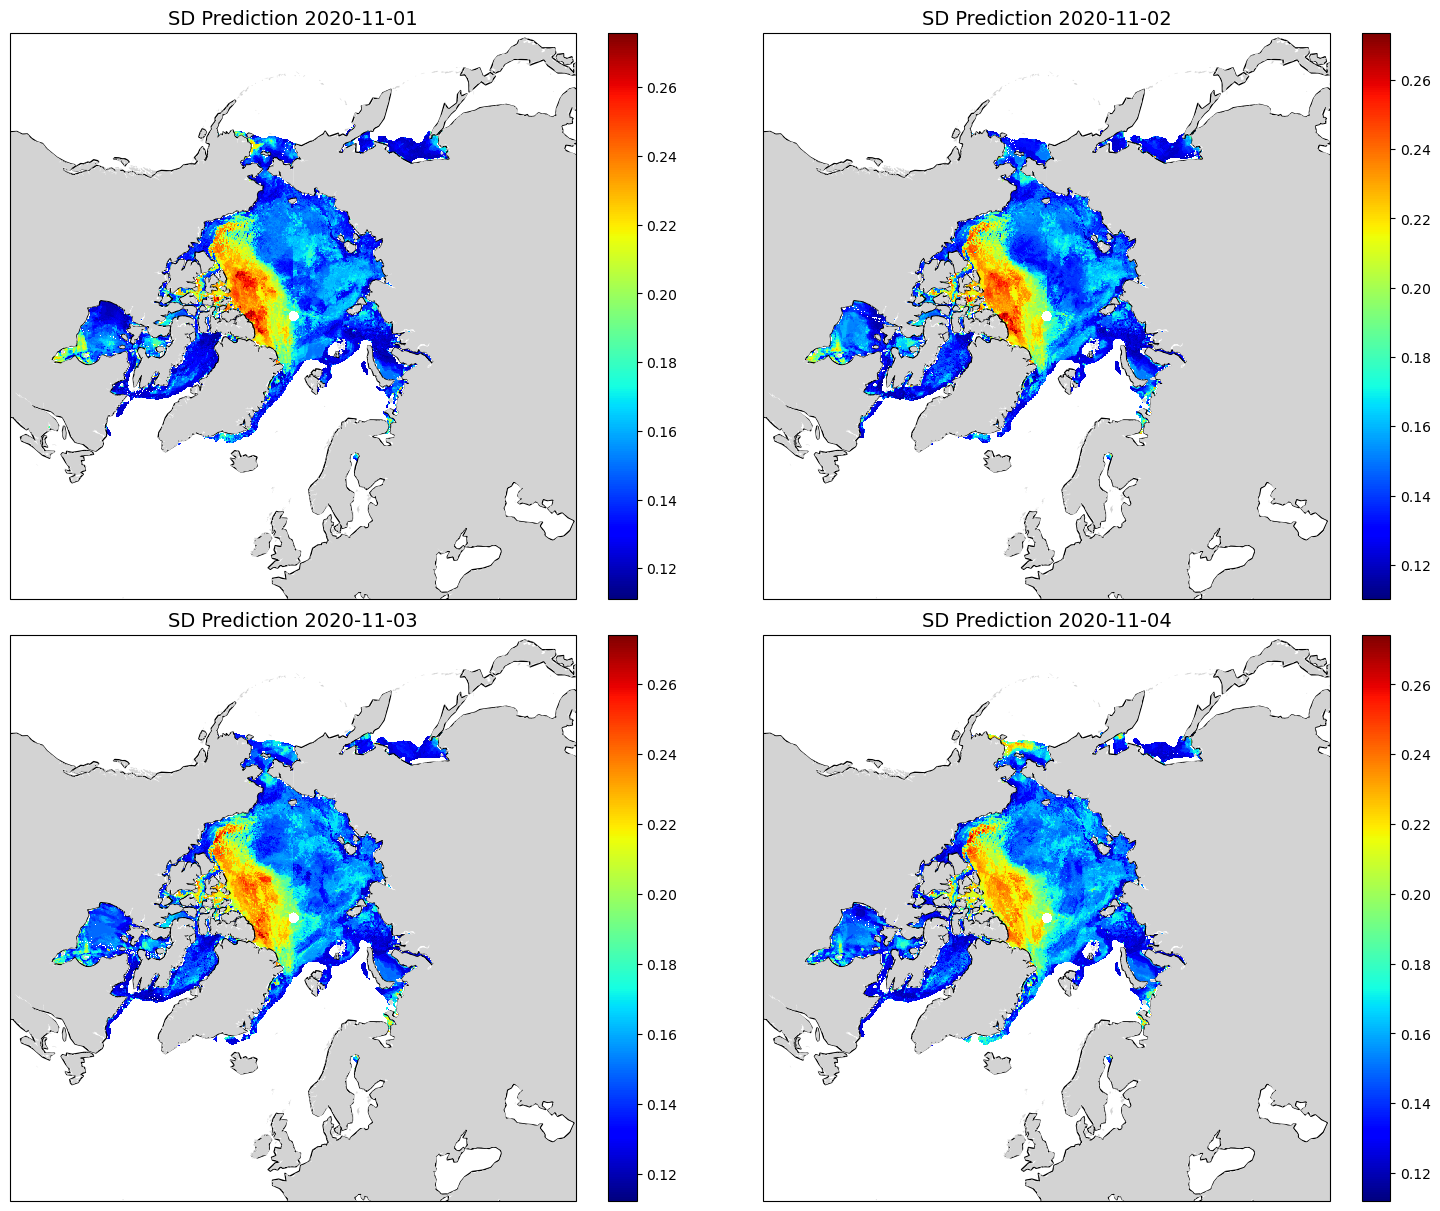

In [16]:
files = sd_df['filename'].tolist()[4:]
ds = xr.open_mfdataset(files)

fig = plt.figure(figsize=(15,12), constrained_layout=True)
for i, file in enumerate(files):
    ax = sp.polar_pcolormesh(fig, (2,2,i+1),x=ds['x'][::4], y=ds['y'][::4], val=ds['sd'].isel(time=i)[::4,::4], cmap='jet', cbar_kwargs={})
    ax.set_title(f'SD Prediction {sd_df.iloc[i]["date"]}', fontsize=14)


In [14]:
ds = ds.isel(time=0)

In [15]:
ds

<xarray.Dataset> Size: 100MB
Dimensions:  (y: 2880, x: 2880)
Coordinates:
    time     datetime64[ns] 8B 2020-11-01
  * x        (x) int32 12kB -4498437 -4495312 -4492187 ... 4495312 4498437
  * y        (y) int32 12kB 4498437 4495312 4492187 ... -4495312 -4498437
    lat      (y, x) float32 33MB dask.array<chunksize=(2880, 2880), meta=np.ndarray>
    lon      (y, x) float32 33MB dask.array<chunksize=(2880, 2880), meta=np.ndarray>
Data variables:
    sd       (y, x) float32 33MB dask.array<chunksize=(2880, 2880), meta=np.ndarray>
    crs      int32 4B 0
Attributes: (12/19)
    title:                 Automatic Snow Products - Snow Depth V1.0
    summary:               This dataset contains snow depth (SD) estimates ov...
    contributer_name:      Emil H. Tellefsen, Mai Winstrup, Henriette Skourup...
    contributer_role:      principal_investigator, co_investigator, co_invest...
    software_repository:   https://github.com/EHTellefsen/Automatic_Snow_Prod...
    data_sources:          CETB AMSR2 NSIDC-0630 (https://nsidc.org/data/nsid...
    ...                    ...
    geospatial_lon_units:  degrees_east
    time_coverage_start:   2020-01-01T00:00:00Z
    time_coverage_end:     2024-12-31T23:59:59Z
    keywords:              Snow Depth, AMSR2, ERA5, Machine Learning, Random ...
    email:                 maiwin@space.dtu.dk
    date_created:          2025-10-28